In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 7)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras import regularizers

In [2]:
# 数据加载
nb_classes = 10  # 类别总数
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # 加载数据集--元组形式
print("训练样本初始维度", X_train.shape)
print("训练样本目标值初始维度", y_train.shape)

训练样本初始维度 (60000, 28, 28)
训练样本目标值初始维度 (60000,)


# 60000个 28 x 28 的图像

In [5]:
# 绘图过程内中文乱码解决
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.unicode_minus'] = False

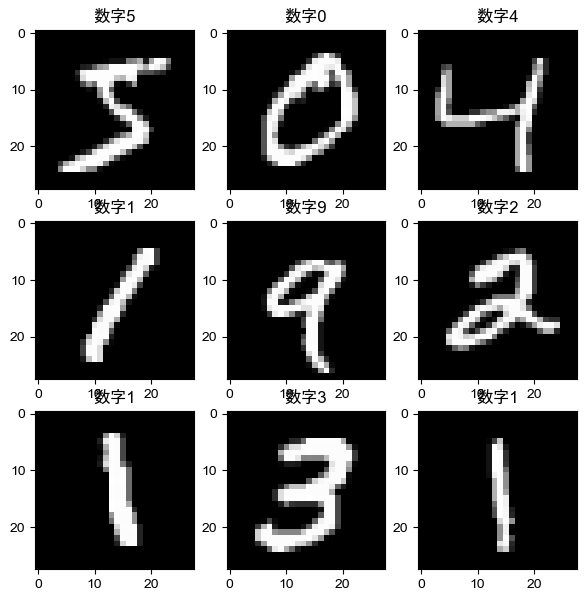

In [6]:
# 数据展示
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("数字{}".format(y_train[i]))

In [7]:
# 数据处理
"""调整数据维度：每一个数字转换成一个向量（一维）：28 x 28 => 784"""
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

"""格式转换"""
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

"""归一化"""
X_train /= 255
X_test /= 255

"""维度调整后的结果"""
print("训练集：", X_train.shape)
print("测试集: ", X_test.shape)

训练集： (60000, 784)
测试集:  (10000, 784)


In [8]:
# 将 目标值 转换为热编码的形式
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [9]:
# 构建模型
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                        

In [11]:
# 模型编译，指明损失函数和优化器，评估指标
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 模型训练
"""batch_size是每次送入模型中样本个数，epochs是所有样本的迭代次数，并指明验证数据集"""
history = model.fit(X_train, Y_train, batch_size=128, epochs=4,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/4


2024-07-12 16:29:08.527990: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 3s 5ms/step - loss: 0.5224 - accuracy: 0.9306 - val_loss: 0.2590 - val_accuracy: 0.9676
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.2204 - accuracy: 0.9656 - val_loss: 0.1693 - val_accuracy: 0.9717
Epoch 3/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1541 - accuracy: 0.9733 - val_loss: 0.1522 - val_accuracy: 0.9714
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1333 - accuracy: 0.9763 - val_loss: 0.1430 - val_accuracy: 0.9750


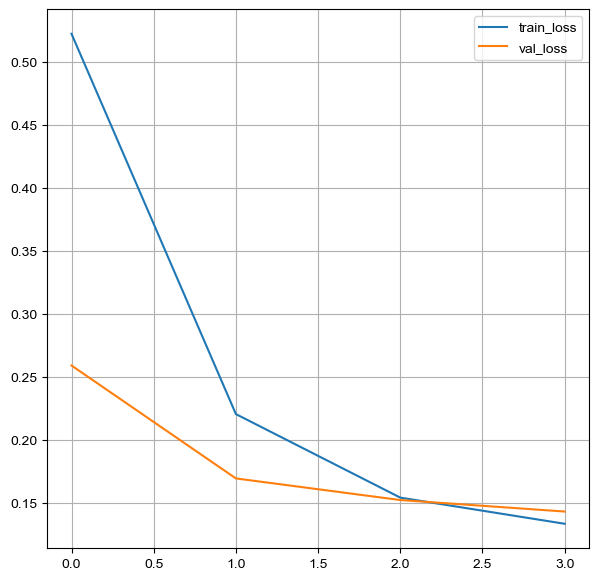

In [13]:
# 数据可视化
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()

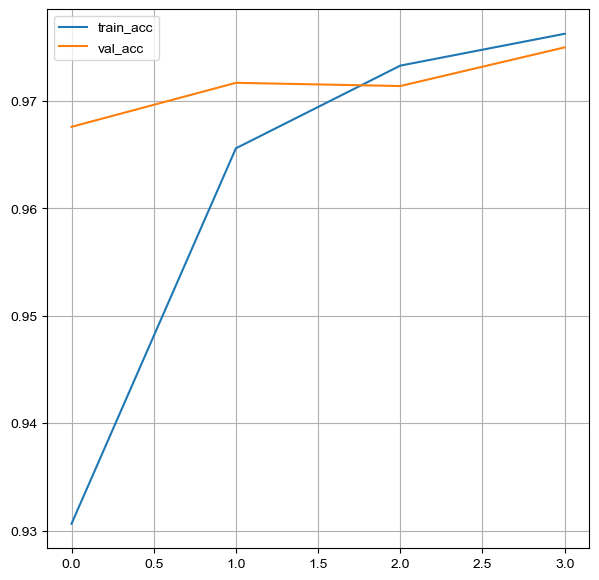

In [14]:
# 绘制准确率的变化曲线
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.grid()

In [15]:
# 添加tensoboard观察
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=1,
                                             write_graph=True, write_images=True)

history = model.fit(X_train, Y_train, batch_size=128, epochs=4, verbose=1, 
                   callbacks=[tensorboard], validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 0.1214 - accuracy: 0.9788 - val_loss: 0.1243 - val_accuracy: 0.9790
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.1143 - accuracy: 0.9806 - val_loss: 0.1281 - val_accuracy: 0.9791
Epoch 3/4
469/469 [==============================] - 3s 5ms/step - loss: 0.1110 - accuracy: 0.9816 - val_loss: 0.1208 - val_accuracy: 0.9796
Epoch 4/4
469/469 [==============================] - 3s 5ms/step - loss: 0.1084 - accuracy: 0.9825 - val_loss: 0.1241 - val_accuracy: 0.9778


In [16]:
# 指定存在文件的目录，打开下面命令
tensorboard --logdir="./"

SyntaxError: cannot assign to operator (3633609329.py, line 2)

In [17]:
# 模型测试
score = model.evaluate(X_test, Y_test, verbose=1)
print("测试集准确率为: ", score)

313/313 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9778
测试集准确率为:  [0.12414952367544174, 0.9778000116348267]


In [ ]:
# 保存模型
'''保存模型架构与权重在h5文件中'''
model.save('my_model.h5')

'''加载模型：包括架构和对应的权重'''
model = tf.keras.models.load_model('my_model.h5')